# Edit Molecule by `rdkit.Chem.rdchem.RWMol`

If you use RKkit, sometimes you want to edit the molecules you are dealing with. The molecule in rdkit is usually treated as a **mol instance**, but since it cannot be edited, it is necessary to convert it into `RWMol (read/write Mol) instance`.




`rdkit.Chem.rdchem.RWMol` is the **sub-class** of `rdkit.Chem.rdchem.Mol` class located in the rdkit.Chem.rdchem module of the RDKit library. `rdkit.Chem.rdchem.RWMol` represents a molecule class with additional **read** and **write** functionalities. Basically, you build a new molecule or **modify** a molecule represented by the `RWMol` sub-class[^1].

## detail
`rdkit.Chem.rdchem.RWMol` represents a molecule class with additional read and write functionalities. Basically, you build a new molecule or modify a molecule represented by the RWMol sub-class.↳

Here are some useful methods provided in the RWMol sub-class.

### Add
* `m = rdkit.Chem.rdchem.RWMol()` - Creates an empty molecule.
* `m.AddAtom(a)` or `rdkit.Chem.rdchem.RWMol.AddAtom(m, a)` - Adds a given atom to the given molecule.
* `m.AddBond(i, j)` or `rdkit.Chem.rdchem.RWMol.AddBond(m, i, j)` - Adds a bond from the $i$-th atom to the $j$-th atom in the given molecule.

### Reomve
* `m.RemoveAtom(i)` or `rdkit.Chem.rdchem.RWMol.RemoveAtom(m, i)` - Removes the $i$-th atom from the given molecule.
* `m.RemoveBond(i)` or `rdkit.Chem.rdchem.RWMol.RemoveBond(m, i)` - Removes the $j$-th bond from the given molecule.

### Replace
* `m.ReplaceAtom(i, a)` or `rdkit.Chem.rdchem.RWMol.ReplaceAtom(m, i, a)` - Replaces the $i$-th atom with a given atom in the given molecule.
* `m.ReplaceBond(i, b)` or `rdkit.Chem.rdchem.RWMol.ReplaceBond(m, i, b)` - Replaces $j$-th bond with a given bond in the given molecule.
* `m.InsertMol(s)` or `rdkit.Chem.rdchem.RWMol.InsertMol(m, s)` - Inserts another molecule into the given molecule.

### post-processing(this process beyond the `rdkit.Chem.rdchem.RWMol`)
After manupulating the molecle, we can change the molecule into other format.
* `rdkit.Chem.SanitizeMol(m)` - Sanitizes the given molecule.
* `rdkit.Chem.MolToSmiles(m)` - Returns the SMILES string of the given molecule.
* `rdkit.Chem.MolToMolBlock(m)` - Returns the SDF string of the given molecule.

> Attention! The molecule that obtained by `Chem.rdchem.RWMol` may be invalid, which cannot be converted to SMILES but may be converted to SMARTS

In [21]:
import rdkit
from rdkit import Chem
from rdkit.Chem import rdchem
from rdkit.Chem import Draw

## Mol instance・RWMol instance

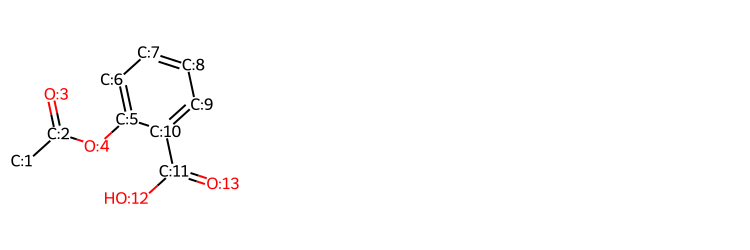

In [22]:
mol = Chem.MolFromSmiles("CC(=O)OC1=CC=CC=C1C(O)=O")  # aspirin
for i, atom in enumerate(mol.GetAtoms(), start=1):
    atom.SetAtomMapNum(i) #add note for atom in molecule
Draw.MolsToGridImage([mol], subImgSize=(250,250))

In [23]:
## Remove atom in molecule

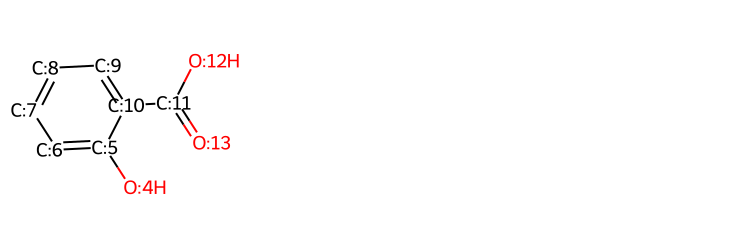

In [24]:
rwmol = rdchem.RWMol(mol)

rm_map_num = [1, 2, 3]
for map_num in rm_map_num:
    idx = [atom.GetIdx() for atom in rwmol.GetAtoms() if atom.GetAtomMapNum() == map_num][0]
    rwmol.RemoveAtom(idx)

mol = rwmol.GetMol()
Chem.SanitizeMol(mol)

Draw.MolsToGridImage([mol], subImgSize=(250,250))

In [25]:
## Add atom in molecule

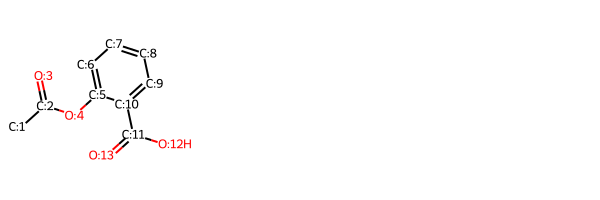

In [26]:
rwmol = rdchem.RWMol(mol)

# C2 -> O4 (single bond)
from_idx = rwmol.AddAtom(Chem.Atom(6))
to_idx = [atom.GetIdx() for atom in rwmol.GetAtoms() if atom.GetAtomMapNum() == 4][0]
rwmol.GetAtomWithIdx(from_idx).SetAtomMapNum(2)
rwmol.AddBond(from_idx, to_idx, Chem.BondType.SINGLE)
# C1 -> C2 (single bond)
from_idx = rwmol.AddAtom(Chem.Atom(6))
to_idx = [atom.GetIdx() for atom in rwmol.GetAtoms() if atom.GetAtomMapNum() == 2][0]
rwmol.GetAtomWithIdx(from_idx).SetAtomMapNum(1)
rwmol.AddBond(from_idx, to_idx, Chem.BondType.SINGLE)
# O3 -> C2 (double bond)
from_idx = rwmol.AddAtom(Chem.Atom(8))
to_idx = [atom.GetIdx() for atom in rwmol.GetAtoms() if atom.GetAtomMapNum() == 2][0]
rwmol.GetAtomWithIdx(from_idx).SetAtomMapNum(3)
rwmol.AddBond(from_idx, to_idx, Chem.BondType.DOUBLE)

mol = rwmol.GetMol()
Chem.SanitizeMol(mol)

Draw.MolsToGridImage([mol])

## Reference

1. https://www.herongyang.com/Cheminformatics/RDKit-rdkit-Chem-rdchem-RWMol-Class.html
2. https://sishida21.github.io/2020/06/15/editable-mol-object-in-rdkit/